In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

                         Medicine              Doctor  \
0                    Abhayarishta  Dr.V.P. Ajil Kumar   
1                    Amritarishta  Dr. Girish Varrier   
2                 Aragvadharishta     Dr.K.R. Shijith   
3                    Aravindasava   Dr.P. Rajalakshmi   
4    Arjunarishta/Parthadyarishta          Dr. Amutha   
..                            ...                 ...   
276                           NaN                 NaN   
277                           NaN                 NaN   
278                           NaN                 NaN   
279                           NaN                 NaN   
280                           NaN                 NaN   

                                                  Link  
0    https://www.chikitsa.com/doctor/dr-vp-ajil-kum...  
1    https://www.chikitsa.com/doctor/dr-girish-varr...  
2    https://www.chikitsa.com/doctor/dr-kr-shijith-...  
3    https://www.chikitsa.com/doctor/dr-p-rajalaksh...  
4    https://www.chikitsa.com/

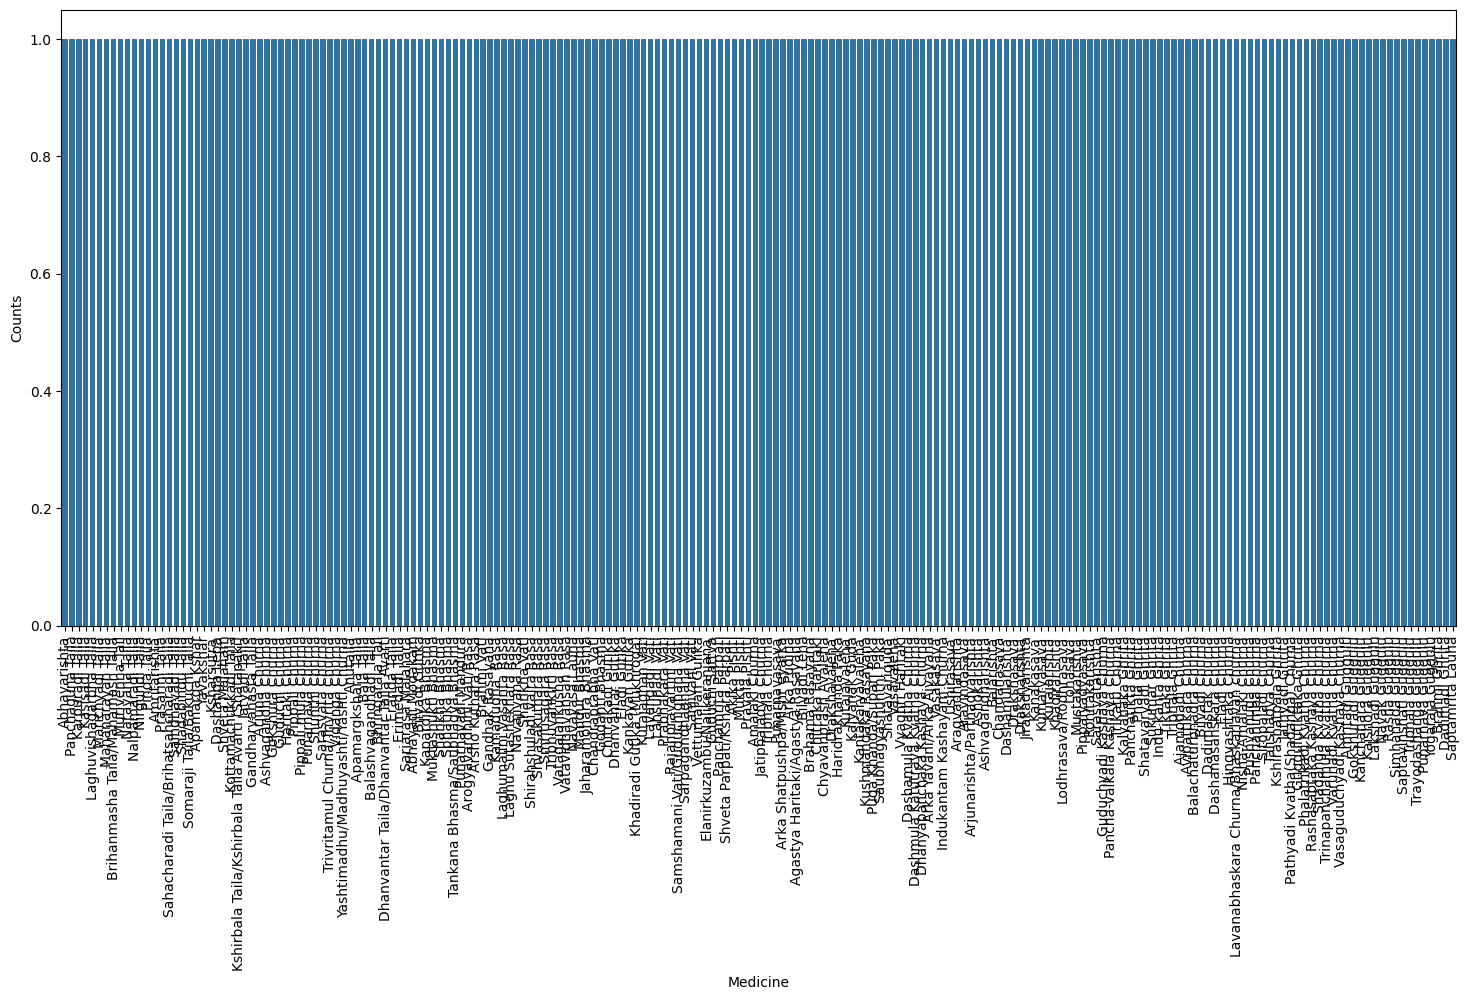

In [2]:
DATA_PATH = r"E:\Users\npuni\Documents\SCE\SIH 2023\Ayurvedic Medicine Suggestion Model\model\AYUSH AYURVEDIC DT.csv"

data = pd.read_csv(DATA_PATH, encoding='ISO-8859-1').dropna(axis=1)
tipdata=pd.read_csv(r"E:\Users\npuni\Documents\SCE\SIH 2023\Ayurvedic Medicine Suggestion Model\model\Tips.csv", encoding='ISO-8859-1').dropna(axis=1)
profdata = pd.read_csv(r"E:\Users\npuni\Documents\SCE\SIH 2023\Ayurvedic Medicine Suggestion Model\model\DrProfile.csv")
print(profdata)


medicine_counts = data["Medicine"].value_counts()
temp_df = pd.DataFrame({
	"Medicine": medicine_counts.index,
	"Counts": medicine_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Medicine", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()


In [3]:
encoder = LabelEncoder()
data["Medicine"] = encoder.fit_transform(data["Medicine"])
tipdata["Medicine"] = encoder.fit_transform(tipdata["Medicine"])


In [4]:
X = data.iloc[:,:-3]
y = data.iloc[:, -3]
u = data.iloc[:,-2]
v = data.iloc[:,-1]
print(X)
print(y)
print(u)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 23)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


     Abhighataja Vedana and Vata Vikara  Abhishyanda  Adhamana  Agnidagdha  \
0                                     0            0         0           0   
1                                     0            0         0           0   
2                                     0            0         0           0   
3                                     0            0         0           0   
4                                     0            0         0           0   
..                                  ...          ...       ...         ...   
195                                   0            0         0           0   
196                                   0            0         0           0   
197                                   0            0         0           0   
198                                   0            0         0           0   
199                                   0            0         0           0   

     Agnimandya  Ajirna  Akshepa  Ama  Amadosha  Amajirna  ... 

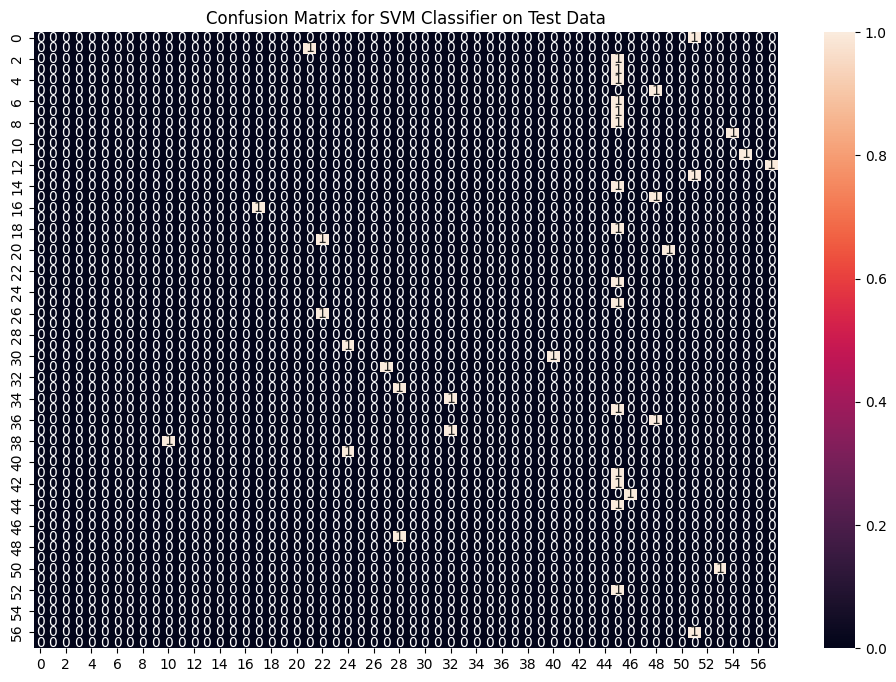

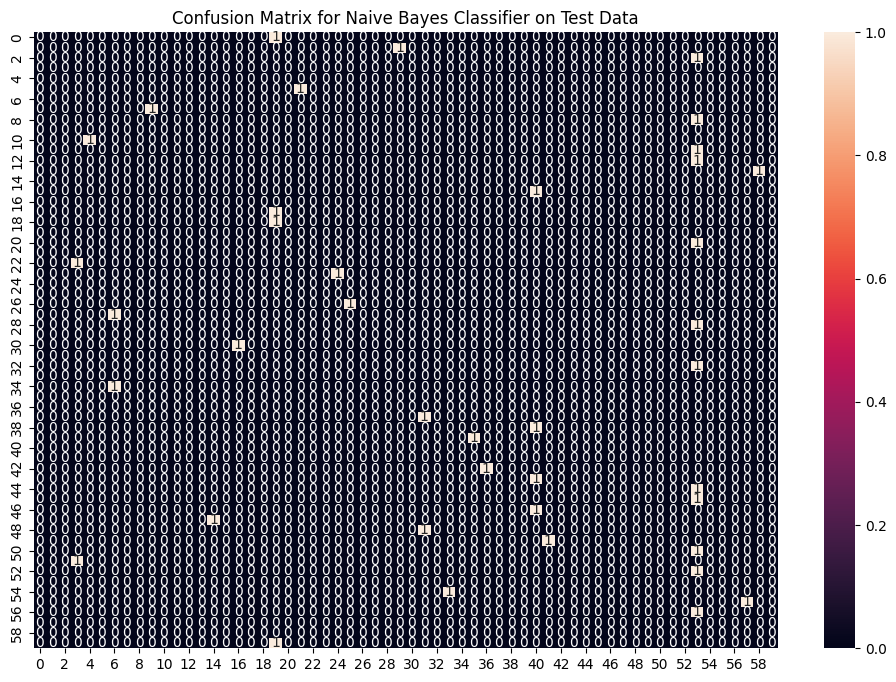

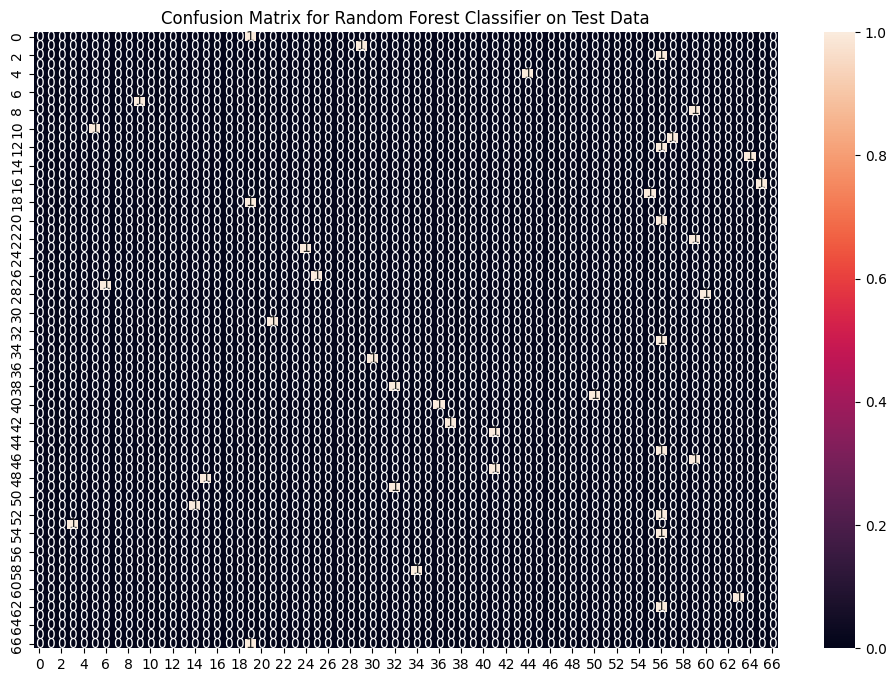

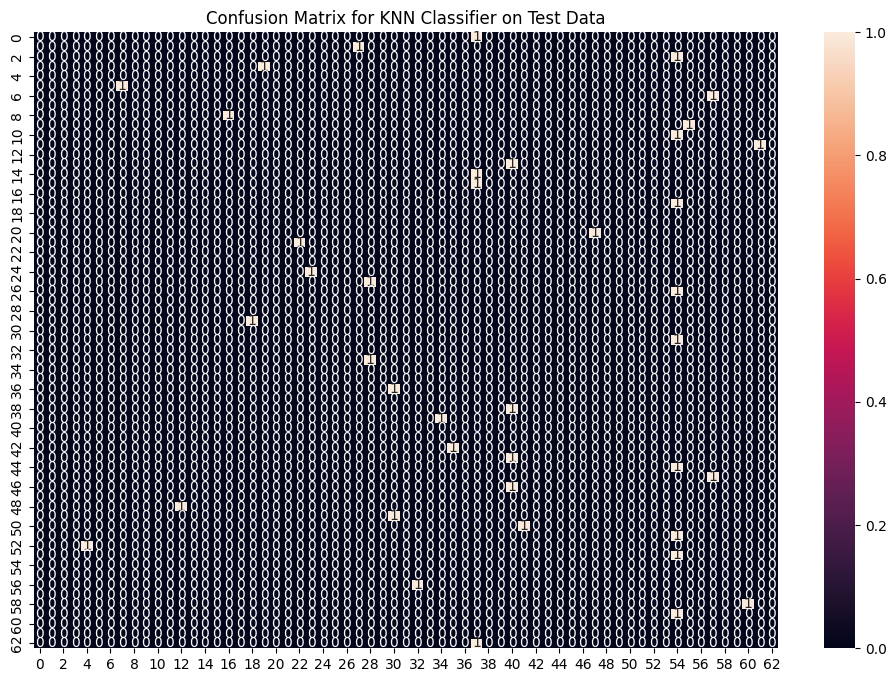

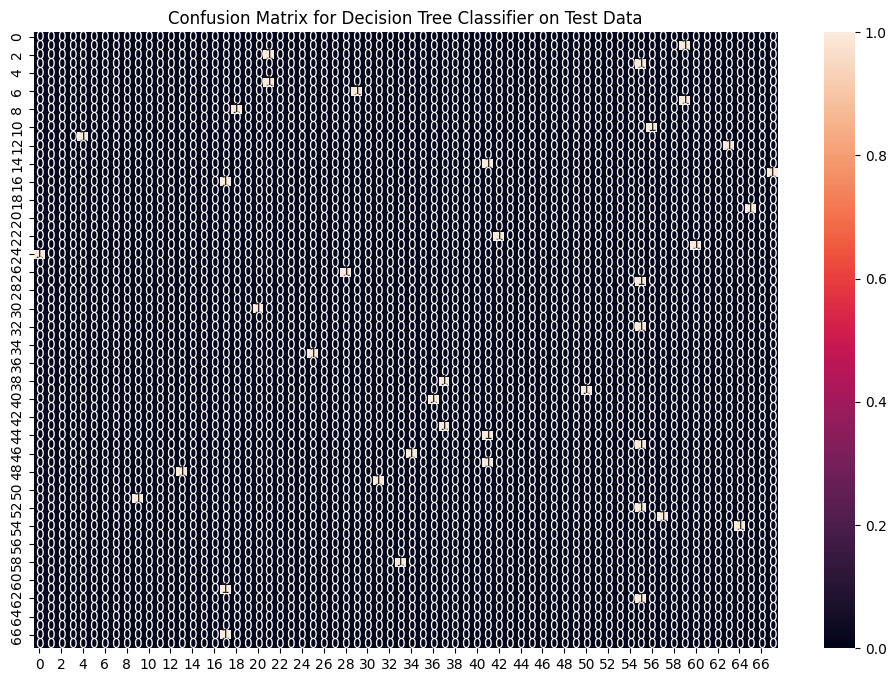

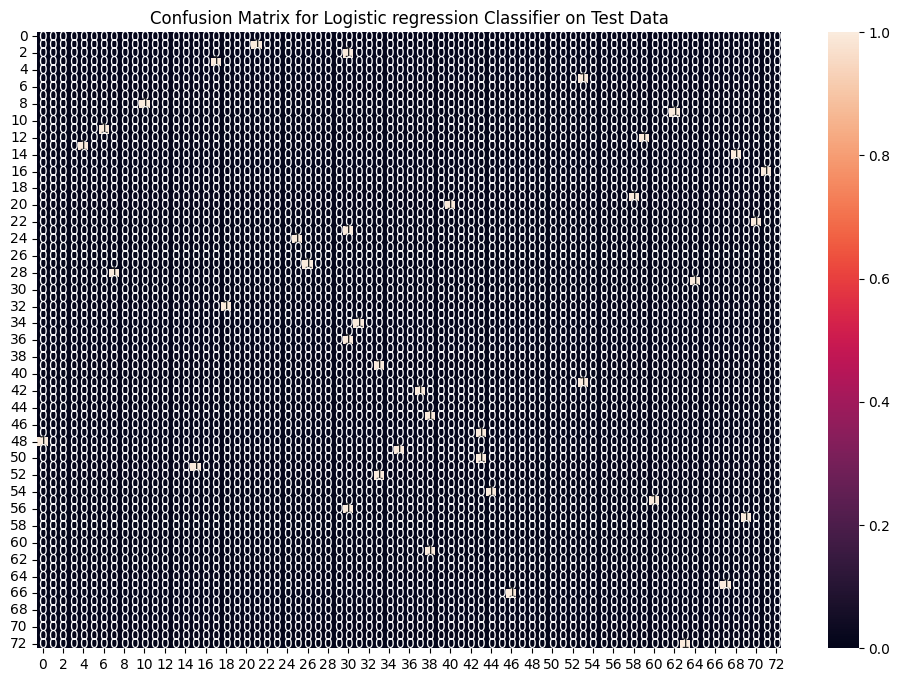

In [5]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)


cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

knn_model= KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)
preds=knn_model.predict(X_test)

cf_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for KNN Classifier on Test Data")
plt.show()

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
preds=dt_model.predict(X_test)

cf_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for Decision Tree Classifier on Test Data")
plt.show()

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train,y_train)
preds=lr_model.predict(X_test)

cf_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for Logistic regression Classifier on Test Data")
plt.show()

In [6]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_knn_model= KNeighborsClassifier(n_neighbors=1)
final_dt_model= DecisionTreeClassifier()
final_lr_model = LogisticRegression(random_state=0)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)
final_knn_model.fit(X,y)
final_dt_model.fit(X,y)
final_lr_model.fit(X,y)

test_data = pd.read_csv(r"E:\Users\npuni\Documents\SCE\SIH 2023\Ayurvedic Medicine Suggestion Model\model\AYUSH AYURVEDIC DT.csv", encoding='ISO-8859-1').dropna(axis=1)

test_X = test_data.iloc[:, :-3]
test_Y = encoder.transform(test_data.iloc[:, -3])

svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)
knn_preds= final_knn_model.predict(test_X)
dt_preds = final_dt_model.predict(test_X)
lr_preds = final_lr_model.predict(test_X)


In [7]:
import pickle

# Save to file in the current working directory
pkl_filename = "AMSA.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(final_rf_model,file)
    pickle.dump(final_nb_model,file)
    pickle.dump(final_svm_model,file)
    pickle.dump(final_knn_model,file)
    pickle.dump(final_dt_model,file)
    pickle.dump(final_lr_model,file)



# Load from file
with open(pkl_filename, 'rb') as file:
    final_rf_model=pickle.load(file)
    final_nb_model=pickle.load(file)
    final_svm_model=pickle.load(file)
    final_knn_model=pickle.load(file)
    final_dt_model=pickle.load(file)
    final_lr_model=pickle.load(file)

    
print(final_rf_model)
print(final_nb_model)
print(final_svm_model)
print(final_knn_model)
print(final_dt_model)
print(final_lr_model)


RandomForestClassifier(random_state=18)
GaussianNB()
SVC()
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier()
LogisticRegression(random_state=0)
